# Dynamic Programming, Part 2

In this notebook, we will cover two advanced dynamic programming problems: edit distance and knapsack.

In [2]:
!pip install pylev
!pip install knapsack

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [3]:
ok="""
         _          _                  _           _        
        /\ \       / /\               / /\        / /\      
       /  \ \     / /  \             / /  \      / /  \     
      / /\ \ \   / / /\ \           / / /\ \__  / / /\ \__  
     / / /\ \_\ / / /\ \ \         / / /\ \___\/ / /\ \___\ 
    / / /_/ / // / /  \ \ \        \ \ \ \/___/\ \ \ \/___/ 
   / / /__\/ // / /___/ /\ \        \ \ \       \ \ \       
  / / /_____// / /_____/ /\ \   _    \ \ \  _    \ \ \      
 / / /      / /_________/\ \ \ /_/\__/ / / /_/\__/ / /      
/ / /      / / /_       __\ \_\\ \/___/ /  \ \/___/ /       
\/_/       \_\___\     /____/_/ \_____\/    \_____\/        
                                                            
"""

## Edit distance

The edit distance problem asks to find the minimal number of insertions, deletions and substitutions of characters required to transform one word into another. A big application of this problem is in spell checking. A spell checker can correct a word if it is not in a dictionary, but its edit distance to some word in the dictionary is small, which means that the user probably intended to use the word from the dictionary and misspelled it. As a refresher, you can read about what edit distance means and about the algorithm to compute it in the textbook: https://people.eecs.berkeley.edu/~vazirani/algorithms/chap6.pdf .

There are two ways how you can store the answers to the subproblems in your dynamic programming problem:
1. Using memoization
2. Using a matrix

We will try both approaches for the first problem.

### Memoization approach

With memoization, you make the function remember answers to the subproblems that it had already solved. If you call the function on some arguments on which it had already been called earlier, it will not recompute the result, but take it out of its memory. One of the possible ways to implement memoization is the following:

In [31]:
s = "ab"
print(s[:2])

ab


In [34]:
def edit_distance_memo(x, y):
    """
    Return the number of insertions, deletions and substitutions required to transform x into y.
    x and y are two strings. Use the memoized approach with storing results to subproblems in
    a dictionary.
    
    x: The first word.
    y: The second word.
    Return value: The number of insertions, deletions and substitutions to transform the first
    word into the second word.
    """
    def edit_distance_memo_helper(x, y, memo):
        if (x, y) in memo:
            return memo[(x, y)]
        else:
            # do the actual computation
            # store the answer in memo[(x, y)]
            """YOUR CODE HERE"""
            for i in range(len(x)+1):
                memo[(x[:i], "")] = i
            for j in range(1, len(y)+1):
                memo[("", y[:j])] = j
            for i in range(1, len(x)+1):
                for j in range(1, len(y)+1):
                    memo[(x[:i], y[:j])] = min(memo[(x[:i-1], y[:j])] + 1, memo[(x[:i], y[:j-1])] + 1, int(x[i-1] != y[j-1]) + memo[(x[:i-1], y[:j-1])])
            return memo[(x, y)]
    memo = {}
    return edit_distance_memo_helper(x, y, memo)

Run the following cell to verify that your solution is correct. The matrix approach should take a couple of seconds, while the memoized approach should take around half a minute to run.

In [35]:
import string
import random
import pylev

NUM_TRIALS = 10
LETTERS = string.ascii_lowercase
MIN_WORD_SIZE = 200
MAX_WORD_SIZE = 400

def verify_correctness_of_edit_distance():
    letters = string.ascii_lowercase
    for i in range(NUM_TRIALS):
        word1_size = random.randint(MIN_WORD_SIZE, MAX_WORD_SIZE)
        word2_size = random.randint(MIN_WORD_SIZE, MAX_WORD_SIZE)
        word1 = ''.join(random.choice(letters) for i in range(word1_size))
        word2 = ''.join(random.choice(letters) for i in range(word2_size))
        student_distance = edit_distance_memo(word1, word2)
        staff_distance = pylev.levenshtein(word1, word2)
        if student_distance != staff_distance:
            print('FAIL: on input word1=%s, word2=%s, expected %d, got %d'%(word1, word2, staff_distance, student_distance))
        assert edit_distance_memo(word1, word2) == pylev.levenshtein(word1, word2)
    print(ok)

verify_correctness_of_edit_distance()


         _          _                  _           _        
        /\ \       / /\               / /\        / /\      
       /  \ \     / /  \             / /  \      / /  \     
      / /\ \ \   / / /\ \           / / /\ \__  / / /\ \__  
     / / /\ \_\ / / /\ \ \         / / /\ \___\/ / /\ \___\ 
    / / /_/ / // / /  \ \ \        \ \ \ \/___/\ \ \ \/___/ 
   / / /__\/ // / /___/ /\ \        \ \ \       \ \ \       
  / / /_____// / /_____/ /\ \   _    \ \ \  _    \ \ \      
 / / /      / /_________/\ \ \ /_/\__/ / / /_/\__/ / /      
/ / /      / / /_       __\ \_\ \/___/ /  \ \/___/ /       
\/_/       \_\___\     /____/_/ \_____\/    \_____\/        
                                                            



### Matrix approach

In a matrix approach, you store the answer to the subproblem at some entry of the matrix. In the case of edit distance, the subproblems are "edit distance for x[1...i] and y[1...j]", so a reasonable approach would be to make a matrix *subproblems* and let *subproblems[i][j] = edit distance for x[1...i] and y[1...j]* (think how you would deal with the base case of an empty string with this approach).

The matrix approach is generally more popular than the memoization approach.

In [50]:
def edit_distance(x, y):
    """
    Return the number of insertions, deletions and substitutions required to transform x into y.
    x and y are two strings. Use the matrix approach here.

    x: The first word.
    y: The second word.
    Return value: The number of insertions, deletions and substitutions to transform the first
    word into the second word.
    """
    """YOUR CODE HERE"""
    memo = [[0 for j in range(len(y)+1)] for i in range(len(x)+1)]
    for i in range(len(x)+1):
        memo[i][0] = i
    for j in range(1, len(y)+1):
        memo[0][j] = j
    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            memo[i][j] = min(memo[i-1][j] + 1, memo[i][j-1] + 1, int(x[i-1] != y[j-1]) + memo[i-1][j-1])

    return memo[len(x)][len(y)]
    """END OF YOUR CODE"""


Run the following cell to verify that your solution is correct.

In [51]:
import string
import random
import pylev

NUM_TRIALS = 10
LETTERS = string.ascii_lowercase
MIN_WORD_SIZE = 800
MAX_WORD_SIZE = 1000

def verify_correctness_of_edit_distance():
    letters = string.ascii_lowercase
    for i in range(NUM_TRIALS):
        word1_size = random.randint(MIN_WORD_SIZE, MAX_WORD_SIZE)
        word2_size = random.randint(MIN_WORD_SIZE, MAX_WORD_SIZE)
        word1 = ''.join(random.choice(letters) for i in range(word1_size))
        word2 = ''.join(random.choice(letters) for i in range(word2_size))
        student_distance = edit_distance(word1, word2)
        staff_distance = pylev.levenshtein(word1, word2)
        if student_distance != staff_distance:
            print('FAIL: on input word1=%s, word2=%s, expected %d, got %d'%(word1, word2, staff_distance, student_distance))  
        assert staff_distance == student_distance
    print(ok)

verify_correctness_of_edit_distance()


         _          _                  _           _        
        /\ \       / /\               / /\        / /\      
       /  \ \     / /  \             / /  \      / /  \     
      / /\ \ \   / / /\ \           / / /\ \__  / / /\ \__  
     / / /\ \_\ / / /\ \ \         / / /\ \___\/ / /\ \___\ 
    / / /_/ / // / /  \ \ \        \ \ \ \/___/\ \ \ \/___/ 
   / / /__\/ // / /___/ /\ \        \ \ \       \ \ \       
  / / /_____// / /_____/ /\ \   _    \ \ \  _    \ \ \      
 / / /      / /_________/\ \ \ /_/\__/ / / /_/\__/ / /      
/ / /      / / /_       __\ \_\ \/___/ /  \ \/___/ /       
\/_/       \_\___\     /____/_/ \_____\/    \_____\/        
                                                            



## Knapsack without repetition

Now, we will solve the problem called "Knapsack without repetition".

This is an optimization problem. You are given a list of items, and for each item, you are given its weight and its value. You also have a knapsack and you are given how much weight the knapsack can sustain. The problem is to pack up the knapsack with the items in a way to maximize the total value of items in it so that the total weight of the items does not exceed the limit of the knapsack. In this variation of the problem, which is called "Knapsack without repetition", you cannot repeat items, so if you already packed the item number $i$ into the knapsack, you cannot pack it again (in contrast to "Knapsack with repetition", in which you can repeat each item any number of times).

More formally, you are given an integer $W$ and integers $(w_1, v_1), ..., (w_n, v_n)$ where $w_i$ is the weight of the $i$'th item and $v_i$ is the value of the $i$'th item. You have to find a subset of the items $n_1, ..., n_k$ so that $w_{n_1} + ... + w_{n_k} \leq W$ and $v_{n_1} + ... + v_{n_k}$ is maximized. Return the total value of this subset of items. You can read more about this problem in section 6.4 of DPV: https://people.eecs.berkeley.edu/~vazirani/algorithms/chap6.pdf .

In [65]:
def solve_knapsack(W, w, v):
    """
    Solve the knapsack with repetition problem.
    W is the total weight that the knapsack can carry.
    w[1...n] is a list that contains the weights of items.
    v[1...n] is a list that contains the values of items.
    """
    """YOUR CODE HERE"""
    knapsack = [[0 for j in range(len(v)+1)] for i in range(W+1)]

    for j in range(0, len(v)):
        for weight in range(1, W+1):
            index = j
            if w[index] > weight:
                knapsack[weight][j+1] = knapsack[weight][j]
            else:
                knapsack[weight][j+1] = max(knapsack[weight][j], knapsack[weight-w[index]][j]+v[index])

    return knapsack[W][len(v)]

    """END OF YOUR CODE"""

Run the following cell to verify that your solution is correct. It should not take more than a couple of seconds to run.

In [67]:
import knapsack

NUM_ITEMS = 75
MAX_CAPACITY = 100
MAX_WEIGHT = 100
MAX_VALUE = 100
NUM_TRIALS = 10

def verify_correctness_of_knapsack():
    for i in range(NUM_TRIALS):
        weights = [random.randint(1, MAX_WEIGHT) for j in range(NUM_ITEMS)]
        values = [random.randint(1, MAX_VALUE) for j in range(NUM_ITEMS)]
        our_value = solve_knapsack(MAX_CAPACITY, weights, values)
        real_value = knapsack.knapsack(weights, values).solve(MAX_CAPACITY)[0]
        if our_value != real_value:
            print("FAIL: expected %d, got %d"%(real_value, our_value))
        assert our_value == real_value
    print(ok)

verify_correctness_of_knapsack()    


         _          _                  _           _        
        /\ \       / /\               / /\        / /\      
       /  \ \     / /  \             / /  \      / /  \     
      / /\ \ \   / / /\ \           / / /\ \__  / / /\ \__  
     / / /\ \_\ / / /\ \ \         / / /\ \___\/ / /\ \___\ 
    / / /_/ / // / /  \ \ \        \ \ \ \/___/\ \ \ \/___/ 
   / / /__\/ // / /___/ /\ \        \ \ \       \ \ \       
  / / /_____// / /_____/ /\ \   _    \ \ \  _    \ \ \      
 / / /      / /_________/\ \ \ /_/\__/ / / /_/\__/ / /      
/ / /      / / /_       __\ \_\ \/___/ /  \ \/___/ /       
\/_/       \_\___\     /____/_/ \_____\/    \_____\/        
                                                            



Note that in your implementation, when you referred to subproblems, to compute the dp matrix for the case when you use items $1$ through $j$, you only needed the dp matrix that you computed for items $1$ through $j - 1$. This means that to reduce memory usage, instead of storing the whole dp matrix, you could just store two columns and alternate between them. As a challenge, try implementing knapsack only using $O(W)$ space instead of $O(Wn)$ space by using this optimization. **In a similar way, how would you optimize space usage for the edit distance problem?**

image for homework solution:

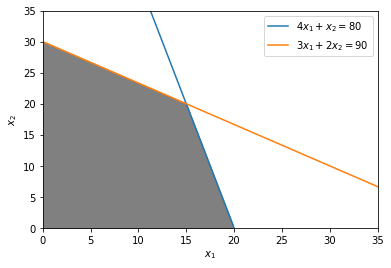

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x1=np.linspace(0,50,200)

fig,ax=plt.subplots()

y1=-4*x1+80
y2=-2/3*x1+30

ax.plot(x1,y1,label=r'$4x_1+x_2=80$')
ax.plot(x1,y2,label=r'$3x_1+2x_2=90$')

y3=np.minimum(y1,y2)
plt.fill_between(x1,0,y3,where=y3>0,color='gray')

ax.set_xlim(0,35)
ax.set_ylim(0,35)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.legend()
plt.show()

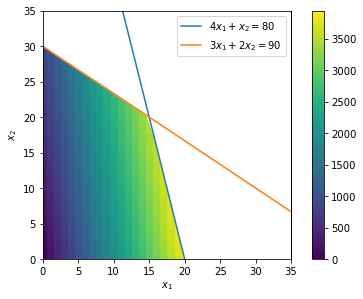

In [99]:
x1= np.arange(0, 36, 0.98)
C = 200
[x, y] = np.meshgrid(x1, x1)

fig,ax=plt.subplots()

y1=-4*x1+80
y2=-2/3*x1+30

ax.plot(x1,y1,label=r'$4x_1+x_2=80$')
ax.plot(x1,y2,label=r'$3x_1+2x_2=90$')

y3=np.minimum(y1,y2)
x[y > y3] = y[y > y3] = 0
z = C * x + 30 * y
plt.imshow(z, interpolation='nearest')
plt.colorbar()
plt.tight_layout()
plt.fill_between(x1,y3,50,color='white')

ax.set_xlim(0,35)
ax.set_ylim(0,35)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.legend()
plt.show()